<a href="https://colab.research.google.com/github/preetu1912/preetu_aiml/blob/main/labsheet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd


In [4]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

data = pd.read_csv('/content/Labsheet 5 Sales.csv')

In [6]:
x=data['GrLivArea']
y=data['SalePrice']
x=(x-x.mean())/x.std()
x=np.c_[np.ones(x.shape[0]),x]

In [8]:
alpha=0.01
iterations=200
m=y.size
np.random.seed(123)
theta=np.random.rand(2)



In [14]:
def gradient_descent(x,y,theta,iterations,alpha):
  past_costs=[]
  past_thetas=[theta]
  for i in range(iterations):
    prediction=np.dot(x,theta)
    error=prediction-y
    cost=(1/(2*m))*np.dot(error.T,error)
    past_costs.append(cost)
    theta=theta-(alpha*1/m)*(np.dot(x.T,error))
    past_thetas.append(theta)


    return past_thetas,past_costs
  past_thetas,past_costs=gradient_descent(x,y,theta,iterations,alpha)
  theta=past_thetas[-1]

  print("Gradient Descent:{:.2f}".form(theta[0],theta[1]))

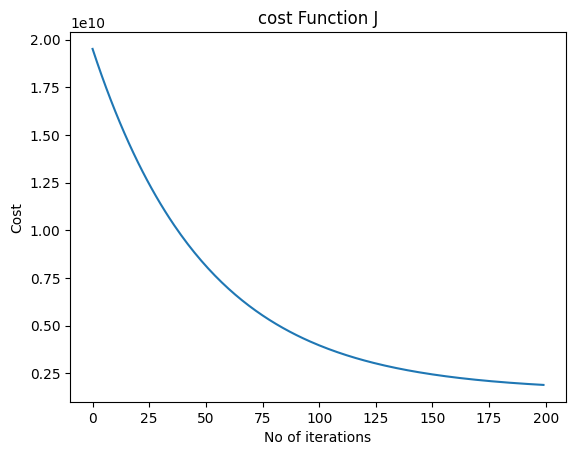

In [20]:
plt.title('cost Function J')
plt.xlabel('No of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

In [22]:
fig=plt.figure()
ax=plt.axes()
plt.title('Sale Price vs Living Area')
plt.xlabel('Living Area in square feet(normalised)')
plt.ylabel('Sale Price($)')
plt.scatter(x[:,1],y,color='red')
line,=ax.plot([],[],lw=2)
annotation=ax.text(-1,70000,'')
annotation.set_animated(True)
plt.close()

In [30]:
def init():
  line.set_data([],[])
  annotation.set_position((-1, 700000))
  return line,annotation

In [36]:
def animate(i):
  x=np.linspace(-5,20,1000)
  y=past_thetas[i][1]*x+past_thetas[i][0]
  line.set_data(x,y)
  # Use min to ensure i does not exceed the list's bounds.
  annotation.set_text('cost=%.2f e10'% (past_costs[min(i, len(past_costs) - 1)]/1000000000))
  return line,annotation


anim = animation.FuncAnimation(fig, animate, init_func=init,
                              # Set frames to the length of past_costs or past_thetas
                              # to avoid accessing elements beyond the list's size.
                              frames=len(past_thetas), interval=0, blit=True)
anim.save('animation.gif',writer='imagemagick',fps=30)